## 1. Import libraries

In [3]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset

In [ ]:
df = pd.read_csv('./bike.csv')

## 3. Exploratory Data Analysis

In [6]:
df.head()
df.head(10)
df.info()
df.tail()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# These commands are used for an initial overview and inspection of the data in a DataFrame in Python:

df.head(): Displays the first five rows of the data.
df.head(10): Displays the first ten rows of the data.
df.info(): Provides a summary of the DataFrame structure, including the number of rows, columns, data type of each column, and the count of non-null values.
df.tail(): Displays the last five rows of the data.
df.describe(): Generates a summary of descriptive statistics for the numeric columns (such as mean, standard deviation, minimum, and maximum values).

## 4. Declare feature vector and target variable

In [83]:
X = df.drop('workingday', axis=1)

y = df['workingday']

### let's take a look at feature vector(X) and target variable(y)

In [84]:
X.head()

,datetime,season,holiday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,1,9.84,14.395,75,0.0,0,1,1


In [85]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: workingday, dtype: int64

## 5. Split data into separate training and test set

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 6. Train the XGBoost classifier


- Now, I will train the XGBoost classifier. We need to know different parameters that XGBoost provides. There are three types of parameters that we must set before running XGBoost. These parameters are as follows:-


### General parameters

These parameters relate to which booster we are doing boosting. The common ones are tree or linear model.


### Booster parameters

It depends on which booster we have chosen for boosting.


### Learning task parameters

These parameters decide on the learning scenario. For example, regression tasks may use different parameters than ranking tasks. 


### Command line parameters

In addition there are command line parameters which relate to behaviour of CLI version of XGBoost.


The most important parameters that we should know about are as follows:-


**learning_rate** - It gives us the step size shrinkage which is used to prevent overfitting. Its range is [0,1].

**max_depth** - It determines how deeply each tree is allowed to grow during any boosting round.

**subsample** - It determines the percentage of samples used per tree. Low value of subsample can lead to underfitting.

**colsample_bytree** - It determines the percentage of features used per tree. High value of it can lead to overfitting.

**n_estimators** - It is the number of trees we want to build.

**objective** - It determines the loss function to be used in the process. For example, `reg:linear` for regression problems, `reg:logistic` for classification problems with only decision, `binary:logistic` for classification problems with probability.


XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple models. These regularization parameters are as follows:-


**gamma** - It controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. It is supported only for tree-based learners.

**alpha** - It gives us the `L1` regularization on leaf weights. A large value of it leads to more regularization.

**lambda** - It gives us the `L2` regularization on leaf weights and is smoother than `L1` regularization.

Though we are using trees as our base learners, we can also use XGBoost’s relatively less popular linear base learners and one other tree learner known as `dart`. We have to set the `booster` parameter to either `gbtree` (default), `gblinear` or `dart`.


In [99]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier

# ذخیره نام ستون‌ها برای استفاده در تبدیل numpy array به DataFrame
original_columns_train = list(x_train.columns) if isinstance(x_train, pd.DataFrame) else None
original_columns_test = list(x_test.columns) if isinstance(x_test, pd.DataFrame) else None

# بررسی نوع داده x_train و x_test و تبدیل آن‌ها به DataFrame در صورت نیاز
if isinstance(x_train, np.ndarray) and original_columns_train is not None:
    x_train = pd.DataFrame(x_train, columns=original_columns_train)

if isinstance(x_test, np.ndarray) and original_columns_test is not None:
    x_test = pd.DataFrame(x_test, columns=original_columns_test)

# چاپ نام ستون‌ها فقط اگر داده‌ها از نوع DataFrame هستند
if isinstance(x_train, pd.DataFrame):
    print("Column names in x_train:", x_train.columns.tolist())
    print("Column names in x_test:", x_test.columns.tolist())

# تبدیل ستون 'datetime' به نوع datetime در صورت وجود
if isinstance(x_train, pd.DataFrame) and 'datetime' in x_train.columns:
    x_train['datetime'] = pd.to_datetime(x_train['datetime'], errors='coerce')  # با 'coerce' نادرست‌ها را NaT تبدیل می‌کند
    x_test['datetime'] = pd.to_datetime(x_test['datetime'], errors='coerce')

    # استخراج ویژگی‌های ضروری از تاریخ
    x_train['year'] = x_train['datetime'].dt.year
    x_train['month'] = x_train['datetime'].dt.month
    x_train['hour'] = x_train['datetime'].dt.hour

    x_test['year'] = x_test['datetime'].dt.year
    x_test['month'] = x_test['datetime'].dt.month
    x_test['hour'] = x_test['datetime'].dt.hour

    # حذف ستون تاریخ اصلی (datetime)
    x_train.drop(columns=['datetime'], inplace=True)
    x_test.drop(columns=['datetime'], inplace=True)

# تبدیل داده‌ها به نوع مناسب (numpy array)
x_train = x_train.values.astype(float) if isinstance(x_train, pd.DataFrame) else x_train.astype(float)
x_test = x_test.values.astype(float) if isinstance(x_test, pd.DataFrame) else x_test.astype(float)

y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)

# آموزش مدل
params = {
            'objective':'binary:logistic',
            'max_depth': 5,
            'learning_rate': 0.1,
            'n_estimators':50
        }

           
model = XGBClassifier(**params)  # تنظیمات بهینه برای کاهش زمان آموزش
model.fit(x_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [100]:
# alternatively view the parameters of the xgb trained model
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


## 7. Make predictions with XGBoost Classifier

In [105]:
# make predictions on test data
y_pred = model.predict(x_test)

## 8. Check accuracy score and classification

In [107]:
from sklearn.metrics import accuracy_score, classification_report
# پیش‌بینی
y_predict = model.predict(x_test)

# نمایش دقت
print(f'Accuracy: {accuracy_score(y_test, y_predict)}')

# نمایش گزارش دقیق‌تر از عملکرد مدل
print(classification_report(y_test, y_predict))

Accuracy: 0.8847566574839302
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       686
           1       0.87      0.97      0.92      1492

    accuracy                           0.88      2178
   macro avg       0.90      0.83      0.86      2178
weighted avg       0.89      0.88      0.88      2178



We can see that XGBoost obtain very high accuracy score of 88.47%.

## 13. k-fold Cross Validation using XGBoost


To build more robust models with XGBoost, we must do k-fold cross validation. In this way, we ensure that the original training dataset is used for both training and validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation using the `cv()` method. In this method, we will specify several parameters which are as follows:- 


**nfolds** - This parameter specifies the number of cross-validation sets we want to build. 

**num_boost_round** - It denotes the number of trees we build.

**metrics** - It is the performance evaluation metrics to be considered during CV.

**as_pandas** - It is used to return the results in a pandas DataFrame.

**early_stopping_rounds** - This parameter stops training of the model early if the hold-out metric does not improve for a given number of rounds.

**seed** - This parameter is used for reproducibility of results.

We can use these parameters to build a k-fold cross-validation model by calling `XGBoost's CV()` method.


In [114]:
import xgboost as xgb

# ساخت DMatrix از داده‌های آموزشی
dtrain = xgb.DMatrix(data=x_train, label=y_train)

from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=dtrain, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

`xgb_cv` contains train and test `auc` metrics for each boosting round. Let's preview `xgb_cv`.

In [115]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.613684,0.009113,0.592421,0.024888
1,0.719675,0.005318,0.703269,0.017676
2,0.741866,0.005238,0.715072,0.019256
3,0.750629,0.004914,0.720224,0.016591
4,0.808411,0.001612,0.778925,0.021200


## 14. Feature importance with XGBoost


XGBoost provides a way to examine the importance of each feature in the original dataset within the model. It involves counting the number of times each feature is split on across all boosting trees in the model. Then we visualize the result as a bar graph, with the features ordered according to how many times they appear. 

XGBoost has a **plot_importance()** function that helps us to achieve this task. Then we can visualize the features that has been given the highest important score among all the features. Thus XGBoost provides us a way to do feature selection.

I will proceed as follows:-

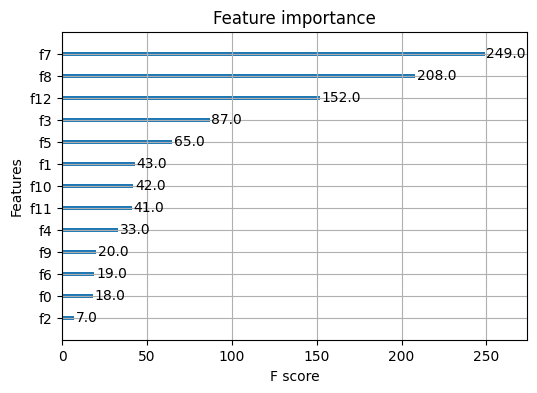

In [119]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

We can see that the feature `Grocery`  has been given the highest importance score among all the features. Thus XGBoost also gives us a way to do Feature Selection.